In [41]:
import pandas as pd
import seaborn as sns

In [42]:
sns.set_palette('deep')

In [43]:
polydeg = '8192'
strip = '(x^4 + y) * z^4 : '
title = '$f(x,y,z) =( x^4 + y) \cdot z^4, \quad d =$'
fname = 'xPow4PlusYTimeszPow4'

path1 = f'{fname}/benchmark_{fname}_ModSwitch_{polydeg}.csv'   #modswitch
path2 = f'{fname}/benchmark_{fname}_noModSwitch_{polydeg}.csv' #no modswitch

In [44]:
path1

'xPow4PlusYTimeszPow4/benchmark_xPow4PlusYTimeszPow4_ModSwitch_8192.csv'

In [45]:
df1 = pd.read_csv(path1)
df2 = pd.read_csv(path2)
raw = (df1, df2)
data = []
for d in raw:
    data.append(pd.DataFrame({'time' : d.iloc[:, 1], 'source': d.columns[1].replace(f'{strip}', '')}))
data = pd.concat(data, axis=0).reset_index(drop=True)
data['time'] = data['time'] * 1e-3

In [46]:
data

,time,source
0,82.873,MODSWITCH
1,98.094,MODSWITCH
2,106.359,MODSWITCH
3,103.920,MODSWITCH
4,81.422,MODSWITCH
...,...,...
1995,75.181,NO MODSWITCH
1996,75.472,NO MODSWITCH
1997,75.175,NO MODSWITCH
1998,75.400,NO MODSWITCH


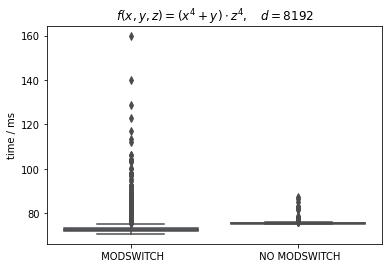

In [47]:
g = sns.boxplot(data=data, x='source', y='time')
g.set_title(title + polydeg)
g.set_xlabel('')
g.set_ylabel('time / ms')
g.figure.savefig( f'{fname}/{fname}_{polydeg}_box.jpg', transparent=False, format='jpg', bbox_inches='tight')

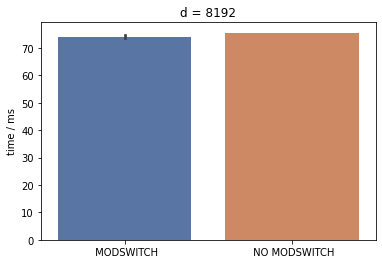

In [48]:
g = sns.barplot(data=data, x='source', y='time')
#g.set_title(title + polydeg)
g.set_title('d = ' + polydeg)
g.set_xlabel('')
g.set_ylabel('time / ms')
g.figure.savefig(f'{fname}/{fname}_{polydeg}_bar.jpg', transparent=False, format='jpg', bbox_inches='tight')

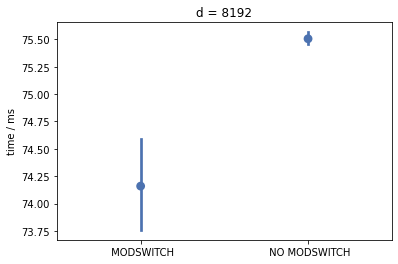

In [49]:
g = sns.pointplot(data=data, x='source', y='time', linestyles=[''])
#g.set_title(title + polydeg)
g.set_title('d = ' + polydeg)
g.set_xlabel('')
g.set_ylabel('time / ms')
g.figure.savefig(f'{fname}/{fname}_{polydeg}_point.jpg', transparent=False, format='jpg', bbox_inches='tight')